In [1]:
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchvision.transforms.functional as F
import torch

def preprocess_image(image):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),
        transforms.Grayscale(num_output_channels=1),
        transforms.ToTensor(),
        # Invert the image to match the training data
        transforms.Lambda(lambda x: 1 - x),
        transforms.Normalize((0.1307,), (0.3081,))
    ])

    image = Image.open(image)
    image = transform(image)

    return image

def predict(image, model):
    with torch.no_grad():
        output = model(image.unsqueeze(0))
        _, predicted = torch.max(output.data, 1)

    return predicted

In [2]:
from src.utils.utils import load_checkpoint
from src.models.model import Net

model = Net()
model_path = r"checkpoints\checkpoint_1\best accuracy\mnist_model_best.pth"
# model.load_state_dict(torch.load(model_path))
model, _, _ = load_checkpoint(model_path, model, None)
model.eval()

# image to tensor
image = preprocess_image("test_images/5.png")
print(image.min(), image.max())
predicted = predict(image, model)
print(predicted.item())

d:\PROJECTs\Handwritten Digit\src\utils\utils.py:23: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  checkpoint = torch.load(path)


tensor(-0.4242) tensor(2.6433)
4


In [3]:
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST('./data', train=True, download=True)
valid_dataset = datasets.MNIST('./data', train=False, download=True, transform=transform)

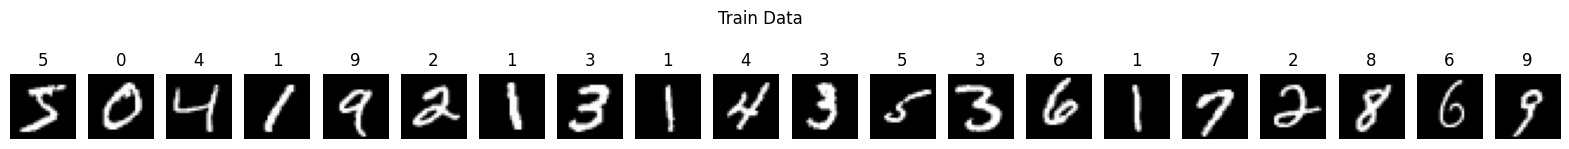

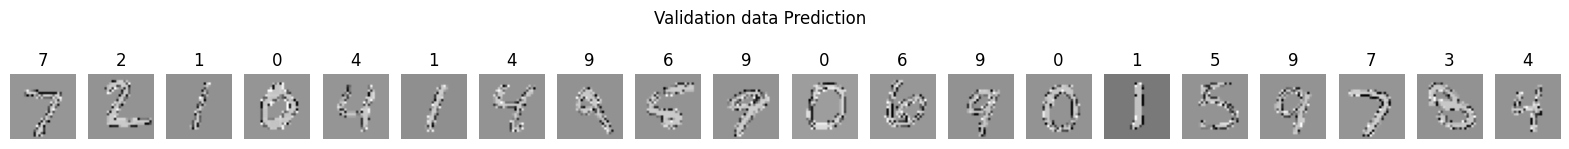

In [4]:
fig, axs = plt.subplots(1, 20, figsize=(20, 2))
fig1, axs1 = plt.subplots(1, 20, figsize=(20, 2))

for i in range(20):
    image, label = train_dataset[i]
    fig.suptitle('Train Data')
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(label)
    axs[i].axis('off')

    image, label = valid_dataset[i]
    fig1.suptitle('Validation data Prediction')
    axs1[i].imshow(F.to_pil_image(image), cmap='gray')
    axs1[i].set_title(model(image.unsqueeze(0)).argmax().item())
    axs1[i].axis('off')
plt.show()

Model loaded from epoch 10


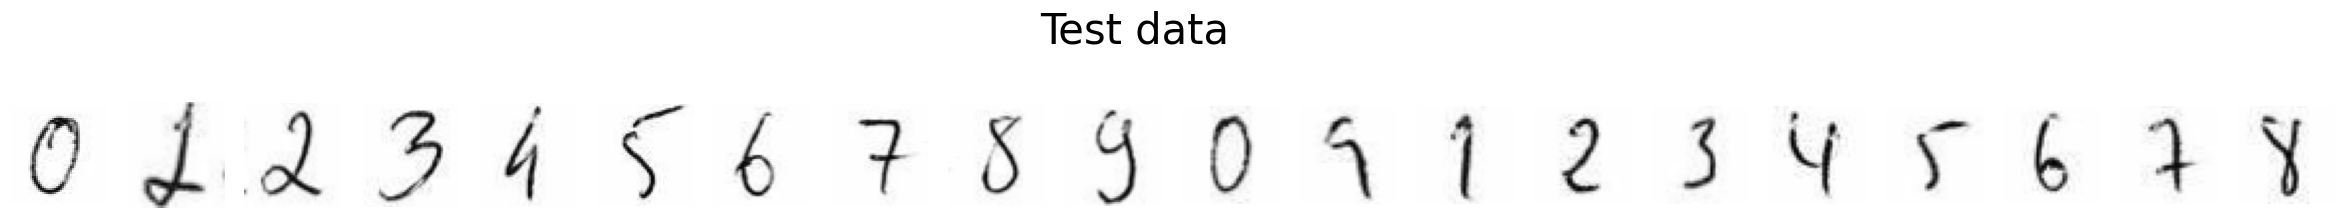

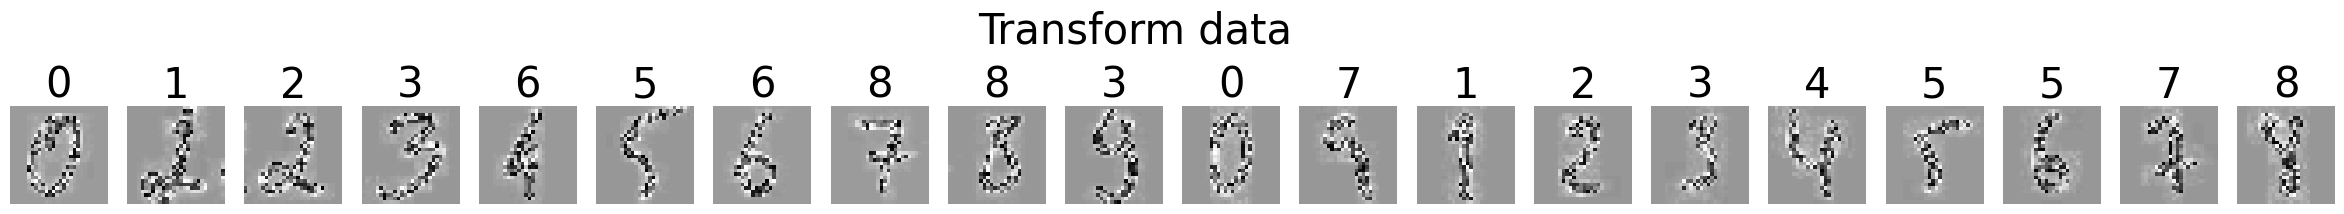

In [9]:
# Test the model on test_images
import os
import matplotlib.pyplot as plt
from utils.utils import load_checkpoint

model = Net()
model_path = r"checkpoints\checkpoint_1\best accuracy\mnist_model_best.pth"
# model.load_state_dict(torch.load(model_path))
try:
    model, _, epoch = load_checkpoint(model_path, model, None)
    print(f"Model loaded from epoch {epoch}")
except:
    model.load_state_dict(torch.load(model_path))
model.eval()

folder_path = r"test_images"
images = os.listdir(folder_path)
fig, axs = plt.subplots(1, len(images), figsize=(30, 3))
fig1, axs1 = plt.subplots(1, len(images), figsize=(30, 3))

for i, image_path in enumerate(os.listdir(folder_path)):
    image_path = os.path.join(folder_path, image_path)
    image = Image.open(image_path)
    fig.suptitle('Test data', fontsize=30)
    axs[i].imshow(image, cmap='gray')

    image = preprocess_image(image_path)
    pred = predict(image, model)

    # axs[i].set_title(pred.item(), fontsize=30)
    axs[i].axis('off')
    
    image = F.to_pil_image(image)
    fig1.suptitle('Transform data', fontsize=30)
    axs1[i].imshow(image, cmap='gray')
    axs1[i].set_title(pred.item(), fontsize=30)
    axs1[i].axis('off')